In [1]:
import warnings 
warnings.filterwarnings('ignore')

#importing required libraries
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
header = ['age', 'no_sexual_partners', 'first_sexual_intercourse', 'no_pregnancies', 'smoke', 'smoke_yrs', 'smokes_packs_yrs', 'hrm_ctr',
          'hrm_ctr_yrs', 'IUD', 'IUD_yrs', 'STDs', 'STDs_no', 'STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis',
          'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis', 'STDs_pelvic_inflam', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum',
          'STDs_AIDS', 'STDs_HIV', 'STDs_hepatitis_B', 'STDs_HPV', 'STDs_no_diag', 'STDs_time_first_diag', 'STDs_time_last_diag', 'Dx_Cancer',
          'Dx_CIN', 'Dx_HPV', 'Dx', 'hinselmann', 'schiller', 'cytology', 'biopsy']

my_data = read_csv('risk_factors_cervical_cancer.csv', names=header, header=None, skiprows=1)
my_data.head()

,age,no_sexual_partners,first_sexual_intercourse,no_pregnancies,smoke,smoke_yrs,smokes_packs_yrs,hrm_ctr,hrm_ctr_yrs,IUD,...,STDs_time_first_diag,STDs_time_last_diag,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,hinselmann,schiller,cytology,biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
my_data.shape

(858, 36)

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   age                                 858 non-null    int64 
 1   no_sexual_partners                  858 non-null    object
 2   first_sexual_intercourse            858 non-null    object
 3   no_pregnancies                      858 non-null    object
 4   smoke                               858 non-null    object
 5   smoke_yrs                           858 non-null    object
 6   smokes_packs_yrs                    858 non-null    object
 7   hrm_ctr                             858 non-null    object
 8   hrm_ctr_yrs                         858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD_yrs                             858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
#displaying null values in our data set 
empty_value = my_data[my_data.isna().any(axis=1)]
empty_value

,age,no_sexual_partners,first_sexual_intercourse,no_pregnancies,smoke,smoke_yrs,smokes_packs_yrs,hrm_ctr,hrm_ctr_yrs,IUD,...,STDs_time_first_diag,STDs_time_last_diag,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,hinselmann,schiller,cytology,biopsy


Python identified 0 null values because the empty spaces have the '?' character.
so wewill be replacing the '?' character with 'nan'

In [6]:
my_data = my_data.replace('?', np.nan)

In [7]:
#displaying null values in our data set 
empty_value = my_data[my_data.isna().any(axis=1)]
empty_value

,age,no_sexual_partners,first_sexual_intercourse,no_pregnancies,smoke,smoke_yrs,smokes_packs_yrs,hrm_ctr,hrm_ctr_yrs,IUD,...,STDs_time_first_diag,STDs_time_last_diag,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,hinselmann,schiller,cytology,biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [8]:
my_data = my_data.apply(pd.to_numeric)

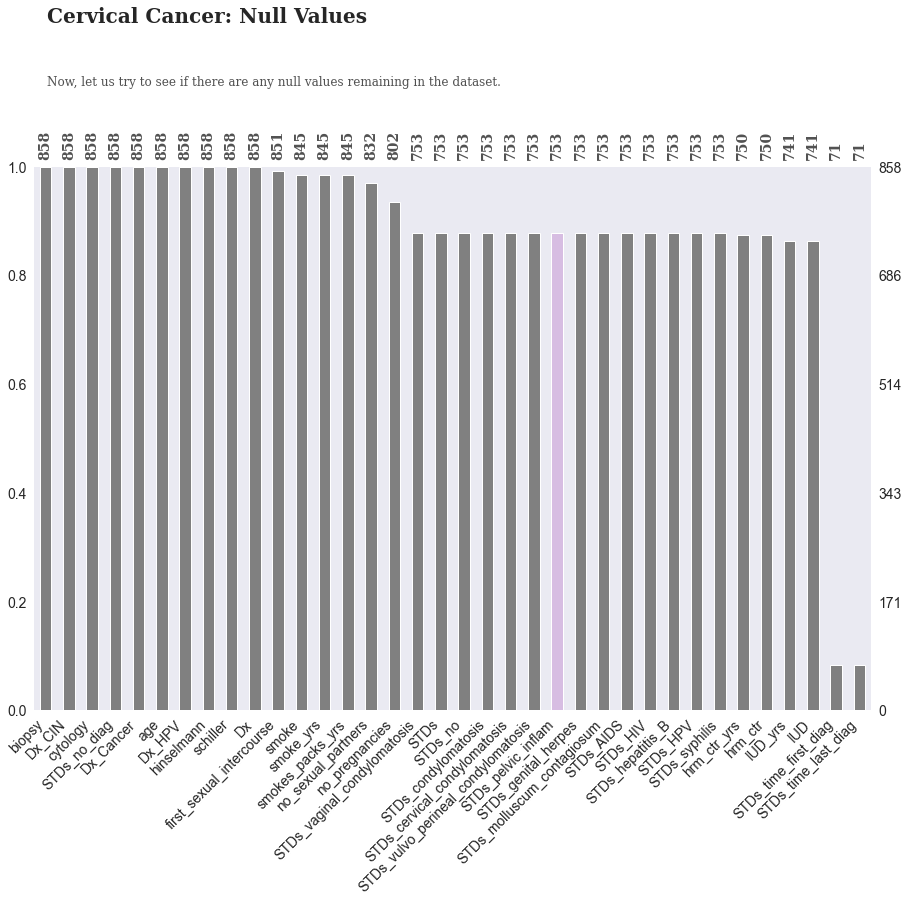

In [9]:
#Visulalizing columns with null values before preprocessing 
import missingno as msno
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(my_data,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Cervical Cancer: Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90, 
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 858 non-null    int64  
 1   no_sexual_partners                  832 non-null    float64
 2   first_sexual_intercourse            851 non-null    float64
 3   no_pregnancies                      802 non-null    float64
 4   smoke                               845 non-null    float64
 5   smoke_yrs                           845 non-null    float64
 6   smokes_packs_yrs                    845 non-null    float64
 7   hrm_ctr                             750 non-null    float64
 8   hrm_ctr_yrs                         750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD_yrs                             741 non-null    float64
 11  STDs                                753 non-n

In [11]:
#Droping columns with very high null values 
my_data.drop(['STDs_time_first_diag', 'STDs_time_last_diag'], axis=1, inplace=True )
new_header = ['age', 'no_sexual_partners', 'first_sexual_intercourse', 'no_pregnancies', 'smoke', 'smoke_yrs',
              'smokes_packs_yrs', 'hrm_ctr', 'hrm_ctr_yrs', 'IUD', 'IUD_yrs', 'STDs', 'STDs_no', 'STDs_condylomatosis',
              'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis','STDs_vulvo_perineal_condylomatosis', 
              'STDs_syphilis', 'STDs_pelvic_inflam', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum','STDs_AIDS',
              'STDs_HIV', 'STDs_hepatitis_B', 'STDs_HPV', 'STDs_no_diag', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx',
              'hinselmann', 'schiller', 'cytology', 'biopsy']
my_data.shape

(858, 34)

In [12]:
my_data = pd.DataFrame(data=my_data, columns=new_header)

In [13]:
my_data.head()

,age,no_sexual_partners,first_sexual_intercourse,no_pregnancies,smoke,smoke_yrs,smokes_packs_yrs,hrm_ctr,hrm_ctr_yrs,IUD,...,STDs_HPV,STDs_no_diag,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,hinselmann,schiller,cytology,biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


filling missing values with most frequent values in our data set to dealwith missing values in the dataset 
using simple imputter from the sklearn lib


In [14]:
#Using Simple Imputer to fillup null values with mode
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(my_data)
new_data = imputer.transform(my_data)

In [15]:
mydata = pd.DataFrame(data=new_data, columns=new_header)

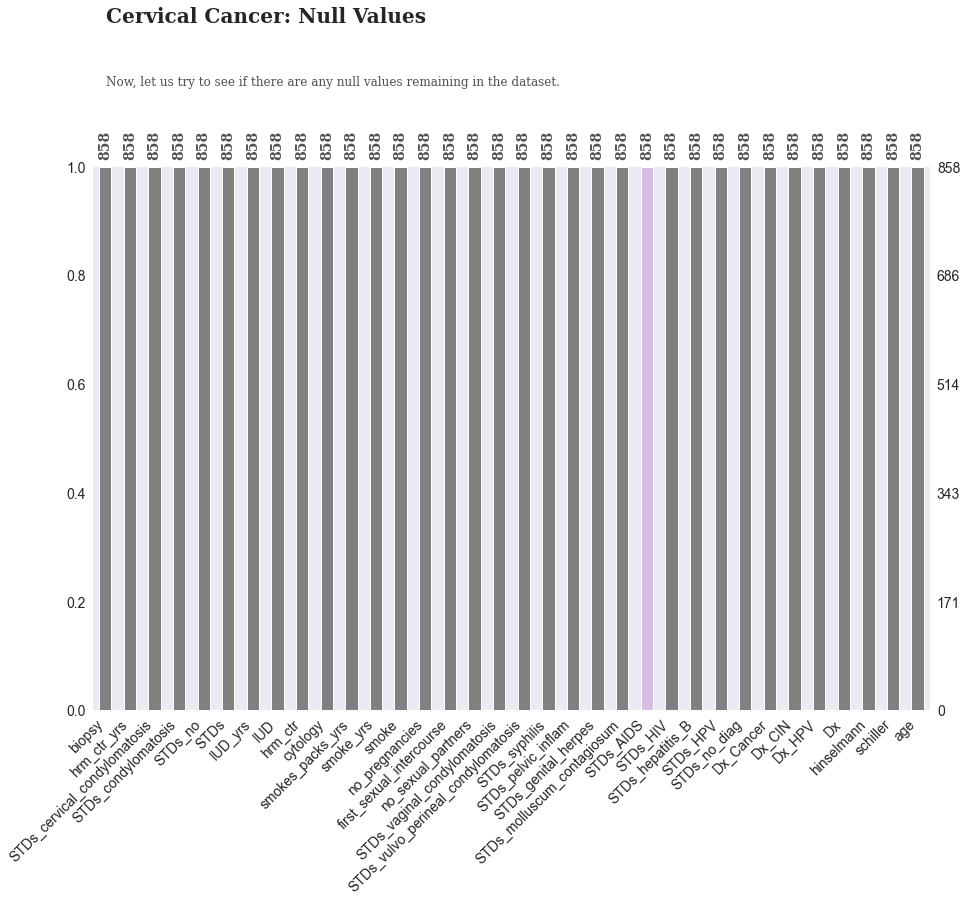

In [16]:
#Visulalizing columns with null values after preprocessing 
import missingno as msno
sns.set_style('dark')
color = ['grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','grey','grey', 'grey','grey','grey','grey','#D7BDE2']
msno.bar(mydata,fontsize =14, color = color, sort = 'descending', figsize = (15,10))

plt.text(0.05,1.265,'Cervical Cancer: Null Values', {'font':'serif', 'size':20, 'weight':'bold'})
plt.text(0.05,1.15,'''Now, let us try to see if there are any null values remaining in the dataset.''', {'font':'serif', 'size':12, 'weight':'normal'}, alpha = 0.8)
plt.xticks( rotation = 90, 
                   **{'font':'serif','size':14,'weight':'bold','horizontalalignment': 'center'},alpha = 0.8)

plt.show()

In [17]:
#checking for null values in our data set 
empty_value = mydata[mydata.isna().any(axis=1)]
empty_value

,age,no_sexual_partners,first_sexual_intercourse,no_pregnancies,smoke,smoke_yrs,smokes_packs_yrs,hrm_ctr,hrm_ctr_yrs,IUD,...,STDs_HPV,STDs_no_diag,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,hinselmann,schiller,cytology,biopsy


We have successfully dealt with missing values in the data set as seen in the cell above

In [18]:
mydata.describe()

,age,no_sexual_partners,first_sexual_intercourse,no_pregnancies,smoke,smoke_yrs,smokes_packs_yrs,hrm_ctr,hrm_ctr_yrs,IUD,...,STDs_HPV,STDs_no_diag,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,hinselmann,schiller,cytology,biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.979021,2.192308,0.143357,1.201241,0.446278,0.686480,1.972394,0.096737,...,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.797653,1.434395,0.350641,4.060623,2.210351,0.464194,3.597888,0.295771,...,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Visualization

age                             AxesSubplot(0.125,0.71587;0.168478x0.16413)
no_sexual_partners           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
first_sexual_intercourse     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
no_pregnancies               AxesSubplot(0.731522,0.71587;0.168478x0.16413)
smoke_yrs                      AxesSubplot(0.125,0.518913;0.168478x0.16413)
smokes_packs_yrs            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
hrm_ctr                     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
hrm_ctr_yrs                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

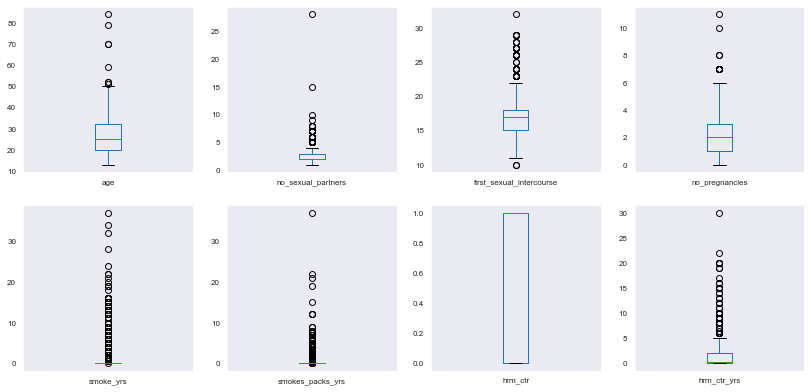

In [19]:
bp_visual=['age', 'no_sexual_partners', 'first_sexual_intercourse', 'no_pregnancies', 'smoke_yrs',
           'smokes_packs_yrs', 'hrm_ctr', 'hrm_ctr_yrs'] 

mydata[bp_visual].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))

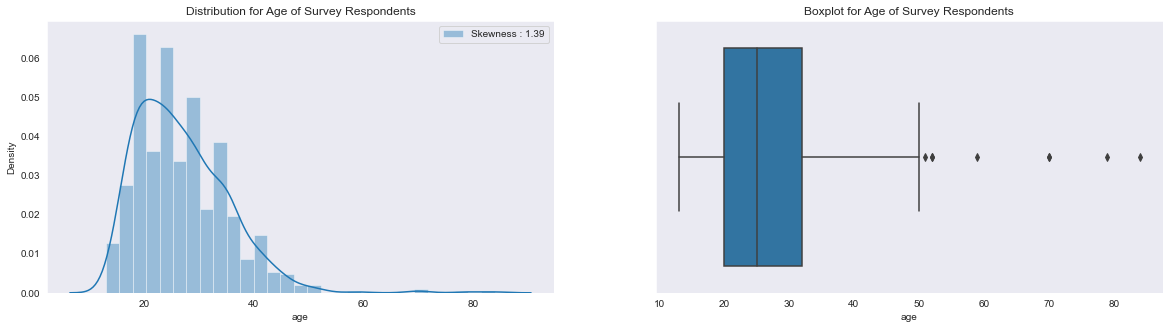

In [20]:
import seaborn as sns
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(mydata['age'], label = 'Skewness : %.2f'%(mydata['age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "age", data = mydata)
plt.title('Boxplot for Age of Survey Respondents')
#age = str(my_data['Age'].describe().round(2))
#plt.text(56, 0.85, age)
plt.show()
plt.show()

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

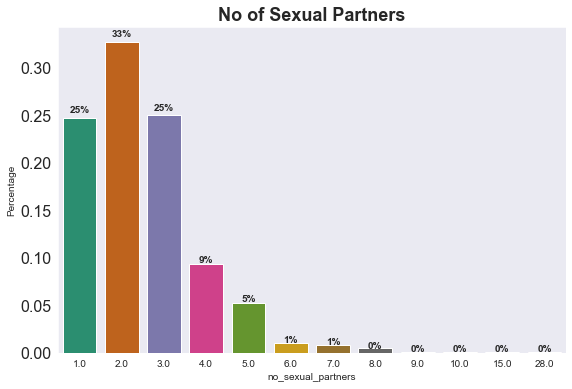

In [21]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = my_data['no_sexual_partners'].value_counts(normalize = True).rename_axis('no_sexual_partners').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'no_sexual_partners', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('No of Sexual Partners', fontsize=18, fontweight='bold')
#plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Text(0.5, 1.0, 'First Sexual Intercourse')

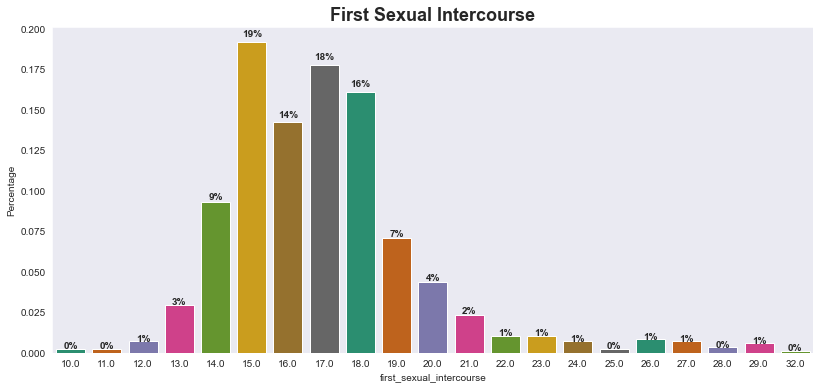

In [22]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = my_data['first_sexual_intercourse'].value_counts(normalize = True).rename_axis('first_sexual_intercourse').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'first_sexual_intercourse', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('First Sexual Intercourse', fontsize=18, fontweight='bold')
#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)

Text(0.5, 1.0, 'No of Pregnancies')

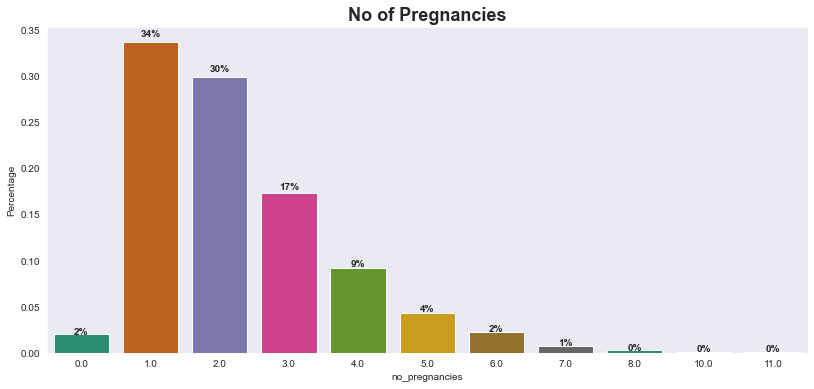

In [23]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
eda_percentage = my_data['no_pregnancies'].value_counts(normalize = True).rename_axis('no_pregnancies').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'no_pregnancies', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('No of Pregnancies', fontsize=18, fontweight='bold')

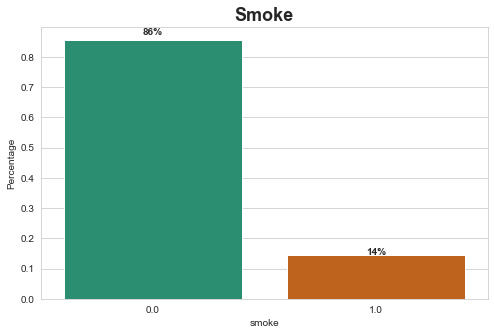

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Smoke', fontsize=18, fontweight='bold')
eda_percentage = mydata['smoke'].value_counts(normalize = True).rename_axis('smoke').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'smoke', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

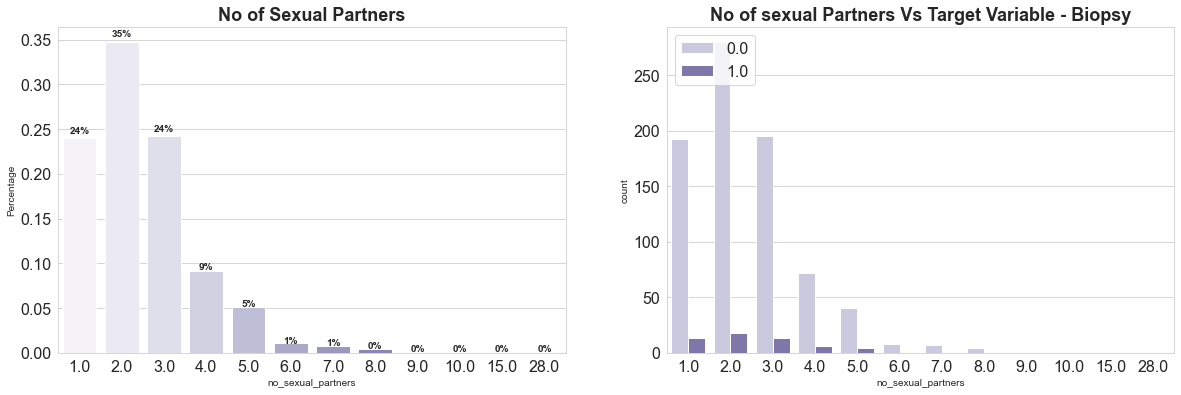

In [25]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mydata['no_sexual_partners'].value_counts(normalize = True).rename_axis('no_sexual_partners').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'no_sexual_partners', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('No of Sexual Partners', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(mydata['no_sexual_partners'], hue = mydata['biopsy'], palette = 'Purples')
plt.title('No of sexual Partners Vs Target Variable - Biopsy',  fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.show()

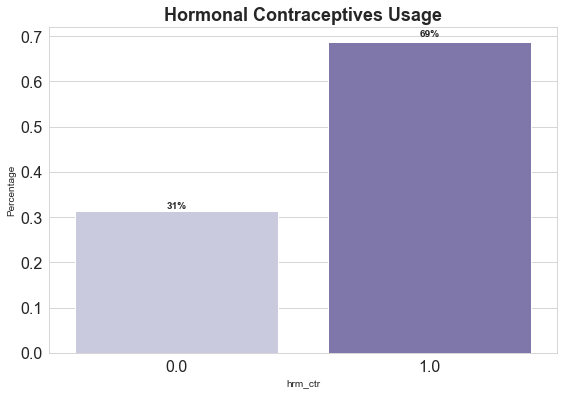

In [26]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mydata['hrm_ctr'].value_counts(normalize = True).rename_axis('hrm_ctr').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'hrm_ctr', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Hormonal Contraceptives Usage', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.show()

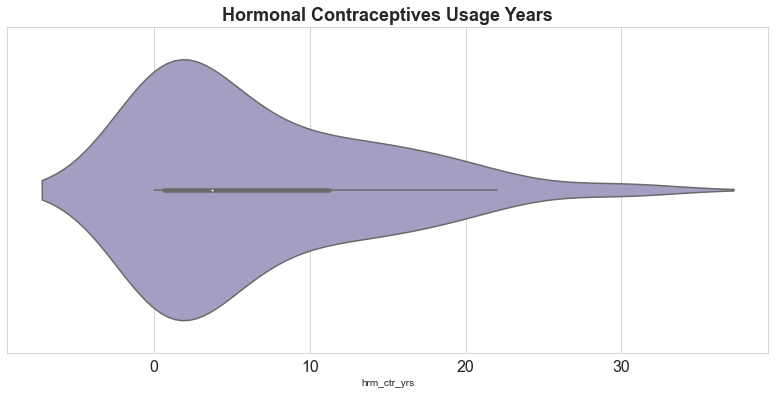

In [27]:
plt.figure(figsize = (30,6))
plt.subplot(1,2,1)
eda_percentage = mydata['hrm_ctr_yrs'].value_counts(normalize = True).rename_axis('hrm_ctr_yrs').reset_index(name = 'Percentage')
ax = sns.violinplot(x = 'hrm_ctr_yrs', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Hormonal Contraceptives Usage Years', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.show()

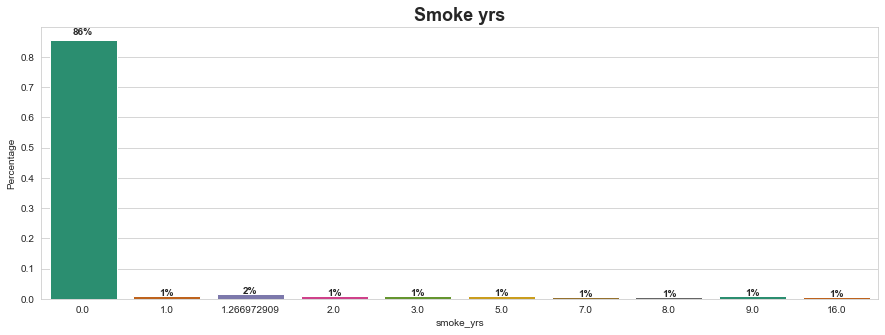

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
plt.title('Smoke yrs', fontsize=18, fontweight='bold')
eda_percentage = mydata['smoke_yrs'].value_counts(normalize = True).rename_axis('smoke_yrs').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'smoke_yrs', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

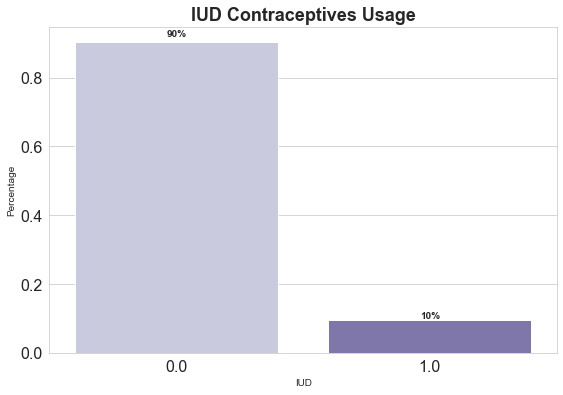

In [29]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mydata['IUD'].value_counts(normalize = True).rename_axis('IUD').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'IUD', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('IUD Contraceptives Usage', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.show()

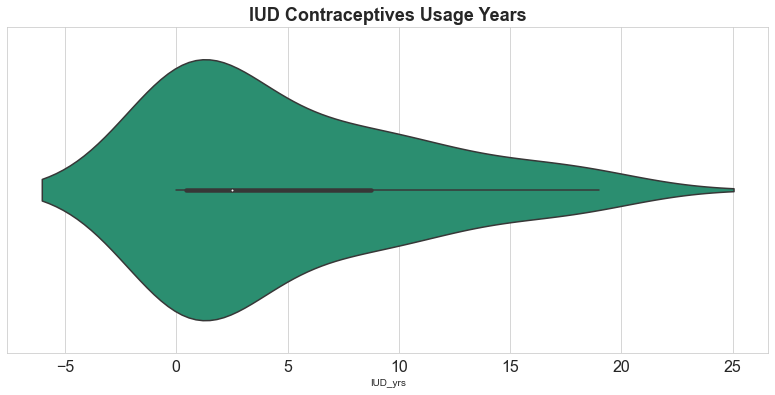

In [30]:
plt.figure(figsize = (30,6))
plt.subplot(1,2,1)
eda_percentage = mydata['IUD_yrs'].value_counts(normalize = True).rename_axis('IUD_yrs').reset_index(name = 'Percentage')
ax = sns.violinplot(x = 'IUD_yrs', data = eda_percentage, palette = 'Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('IUD Contraceptives Usage Years', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.show()

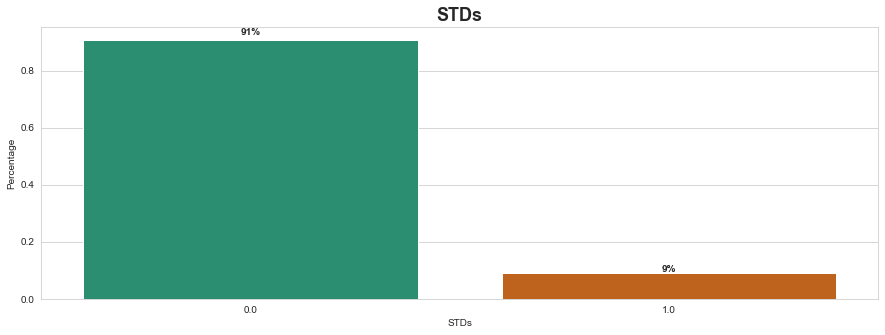

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
plt.title('STDs', fontsize=18, fontweight='bold')
eda_percentage = mydata['STDs'].value_counts(normalize = True).rename_axis('STDs').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'STDs', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

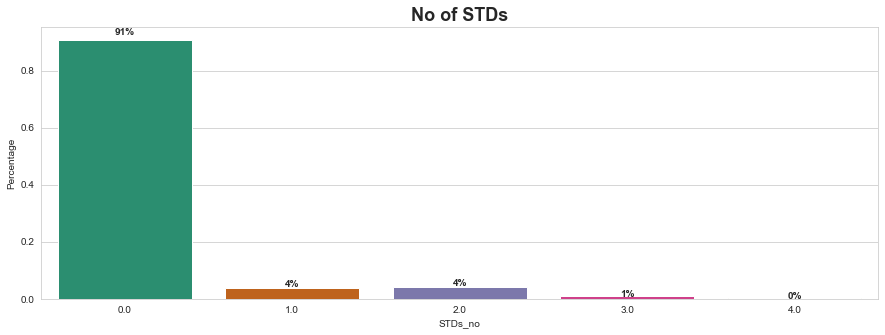

In [32]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
plt.title('No of STDs', fontsize=18, fontweight='bold')
eda_percentage = mydata['STDs_no'].value_counts(normalize = True).rename_axis('STDs_no').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'STDs_no', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

'Distribution of Variables'

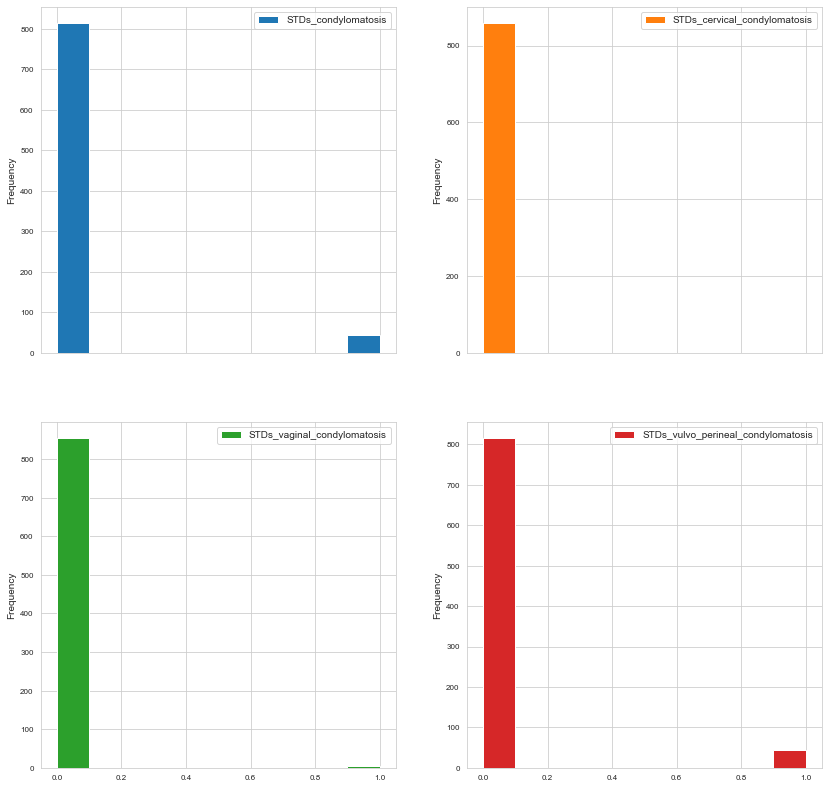

In [33]:
bp_visual=['STDs_condylomatosis', 'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis',
           'STDs_vulvo_perineal_condylomatosis'] 

mydata[bp_visual].plot(kind='hist',subplots=True, layout=(2,2), fontsize=8, figsize=(14,14))
'Distribution of Variables'

'Distribution of Variables'

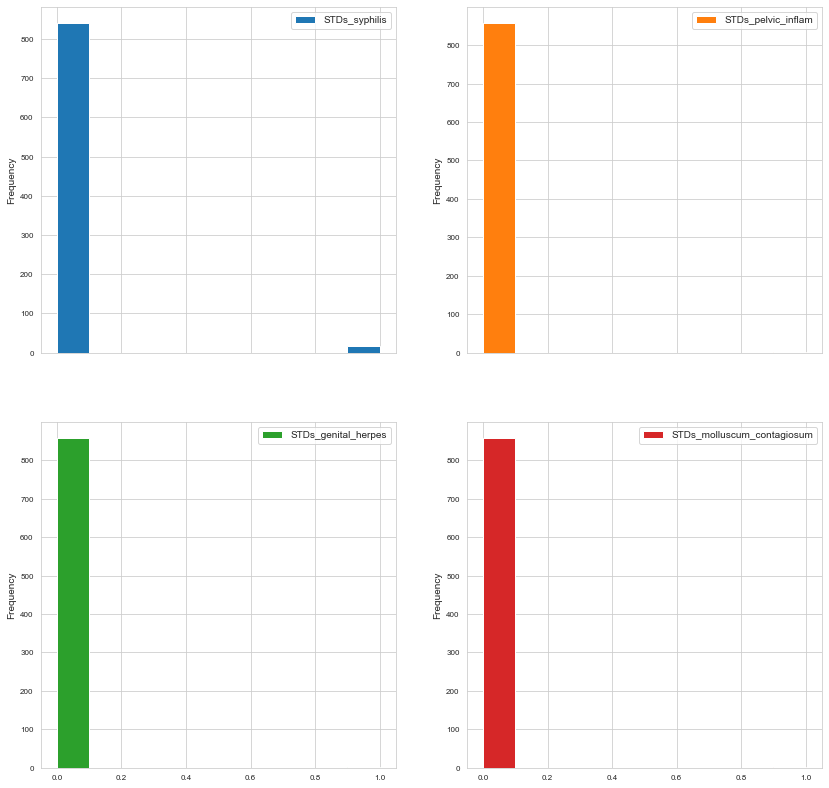

In [34]:
bp_visual=['STDs_syphilis', 'STDs_pelvic_inflam', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum'] 

mydata[bp_visual].plot(kind='hist',subplots=True, layout=(2,2), fontsize=8, figsize=(14,14))

'Distribution of Variables'

'Distribution of Variables'

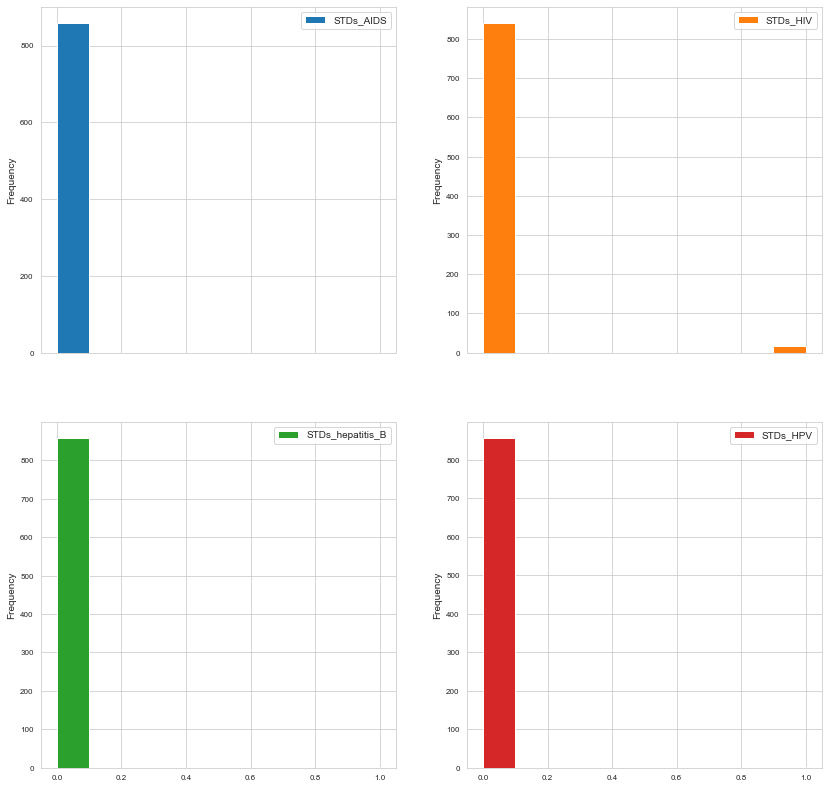

In [35]:
bp_visual=[ 'STDs_AIDS', 'STDs_HIV', 'STDs_hepatitis_B', 'STDs_HPV'] 

mydata[bp_visual].plot(kind='hist',subplots=True, layout=(2,2), fontsize=8, figsize=(14,14))

'Distribution of Variables'

'Distribution of Variables'

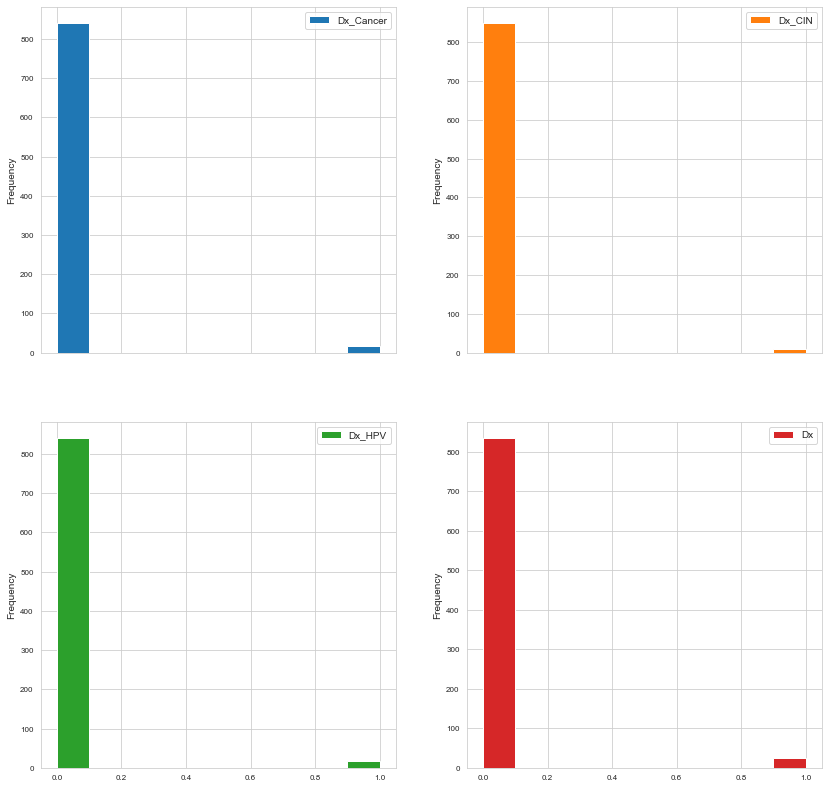

In [36]:
bp_visual=['Dx_Cancer','Dx_CIN', 'Dx_HPV', 'Dx',] 

mydata[bp_visual].plot(kind='hist',subplots=True, layout=(2,2), fontsize=8, figsize=(14,14))

'Distribution of Variables'

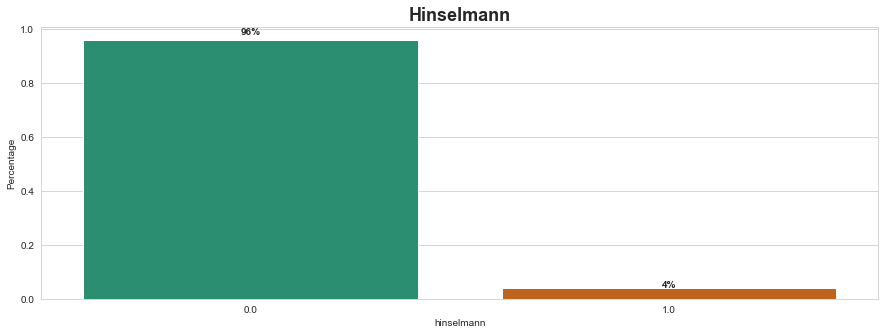

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
plt.title('Hinselmann', fontsize=18, fontweight='bold')
eda_percentage = mydata['hinselmann'].value_counts(normalize = True).rename_axis('hinselmann').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'hinselmann', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

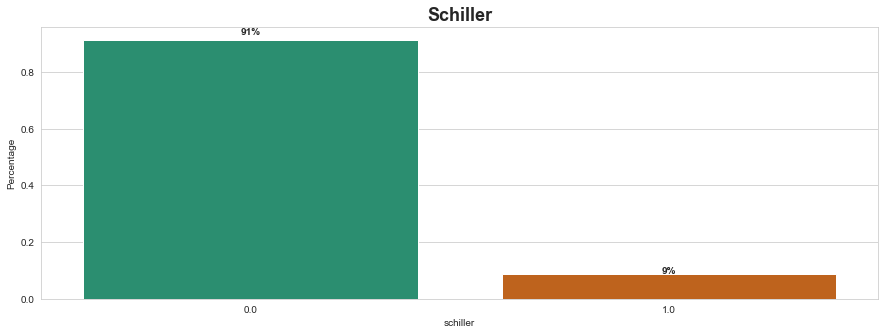

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
plt.title('Schiller', fontsize=18, fontweight='bold')
eda_percentage = mydata['schiller'].value_counts(normalize = True).rename_axis('schiller').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'schiller', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

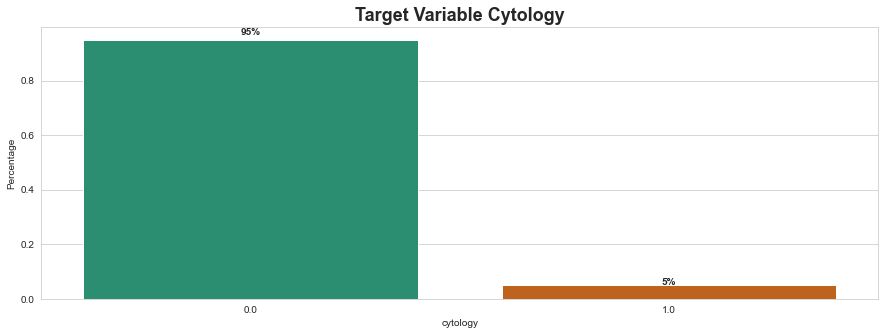

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
plt.title('Target Variable Cytology', fontsize=18, fontweight='bold')
eda_percentage = mydata['cytology'].value_counts(normalize = True).rename_axis('cytology').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'cytology', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

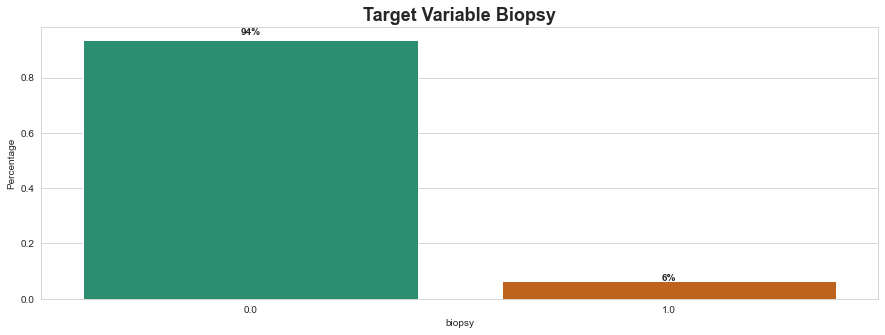

In [40]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,5))
plt.title('Target Variable Biopsy', fontsize=18, fontweight='bold')
eda_percentage = mydata['biopsy'].value_counts(normalize = True).rename_axis('biopsy').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'biopsy', y = 'Percentage', data = eda_percentage.head(10), palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

<AxesSubplot:xlabel='STDs_HPV', ylabel='Dx_Cancer'>

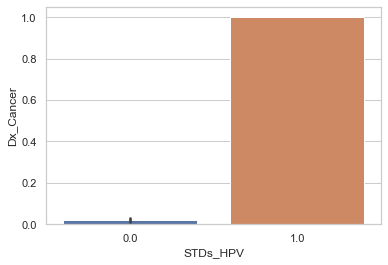

In [41]:
#Swarm plot visualization of the relationship between HPV and DX_Cancer
sns.set(style = 'whitegrid')
sns.barplot(x =mydata['STDs_HPV'], y =mydata['Dx_Cancer'],data = mydata)

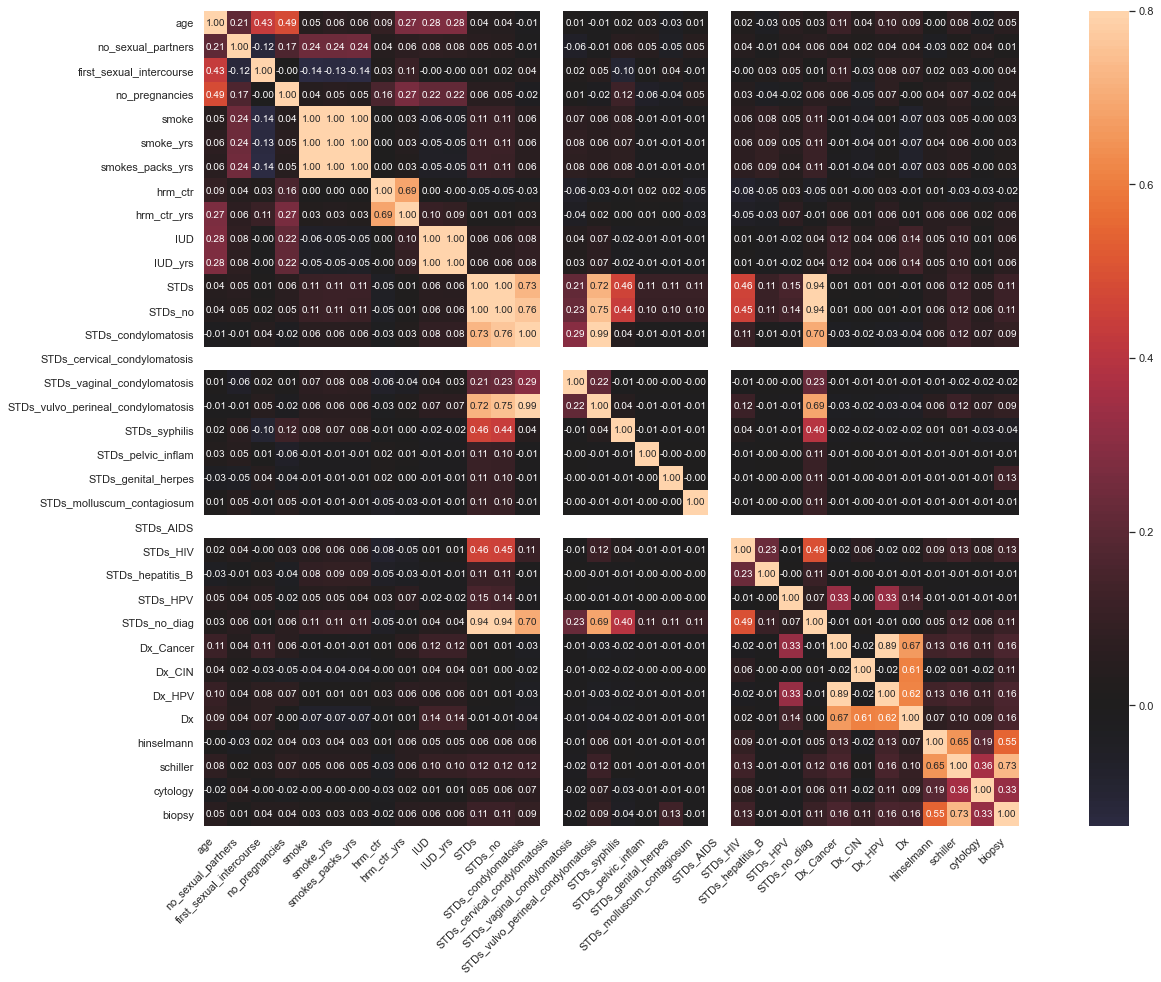

In [42]:
# Heat map visualization of correlation analysis
corr = mydata.corr(method="spearman")

f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr,
            vmax=.8, 
            center = 0,
            square=True,
            cbar=True, 
            annot=True, 
            fmt='.2f', 
            annot_kws={'size': 10}, 
           )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

Notice how two variabels have blank correlation in the data set. This is because all respondent in the survey have never been diagnosed with STDs aids and STD cervical condylomatosis
hence we will be dropping the columns as the both  have no imapct on the model.

In [43]:
mydata.drop(['STDs_AIDS', 'STDs_cervical_condylomatosis'], axis=1, inplace=True )
mydata.shape

(858, 32)

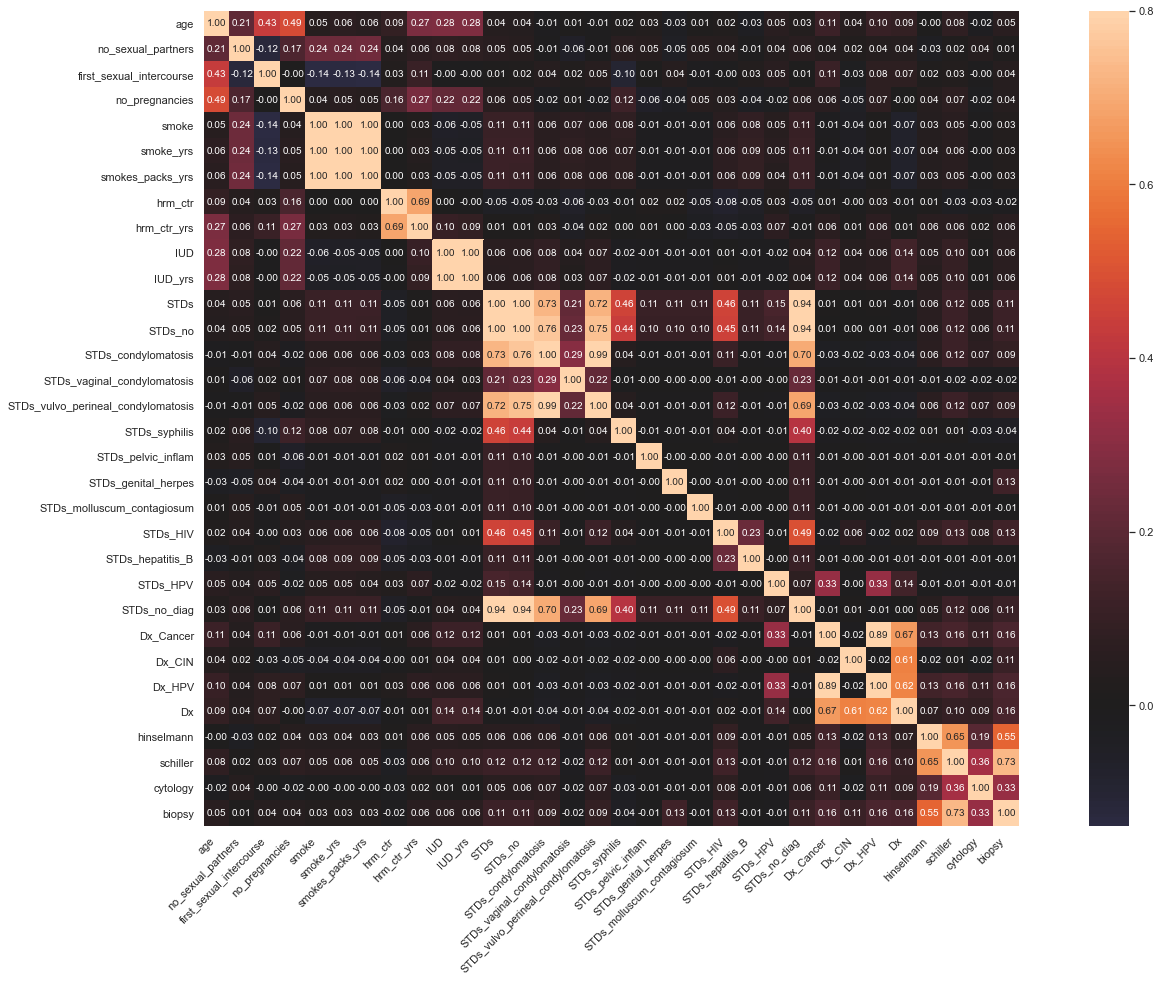

In [44]:
# Heat map visualization of correlation analysis
corr = mydata.corr(method="spearman")

f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr,
            vmax=.8, 
            center = 0,
            square=True,
            cbar=True, 
            annot=True, 
            fmt='.2f', 
            annot_kws={'size': 10}, 
           )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [45]:
#mydata.to_excel(excel_writer='preprocessed_data1.xlsx')

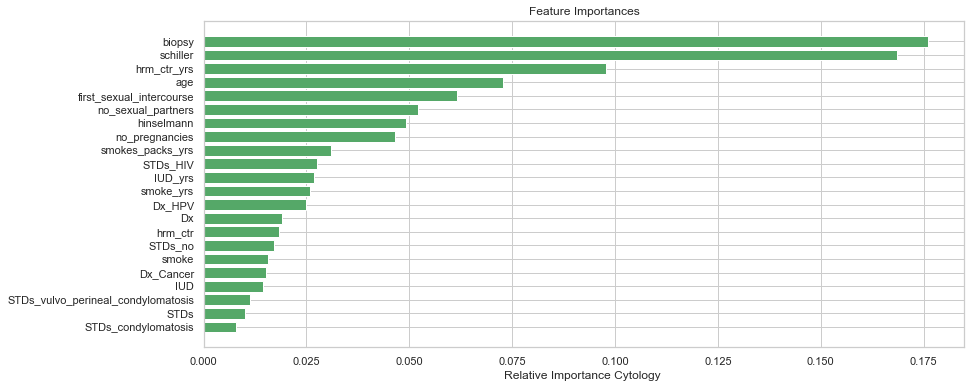

In [46]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
X_data=mydata.drop(['cytology'], axis=1)

#declare the random forest model
rf_model = RandomForestClassifier(random_state=1, max_depth=4)

#fit the random forest model
rf_model.fit(X_data, my_data.cytology)

train_features = X_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-22:]
#plot
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [train_features[i]for i in indices])
plt.xlabel('Relative Importance Cytology ')
plt.show()

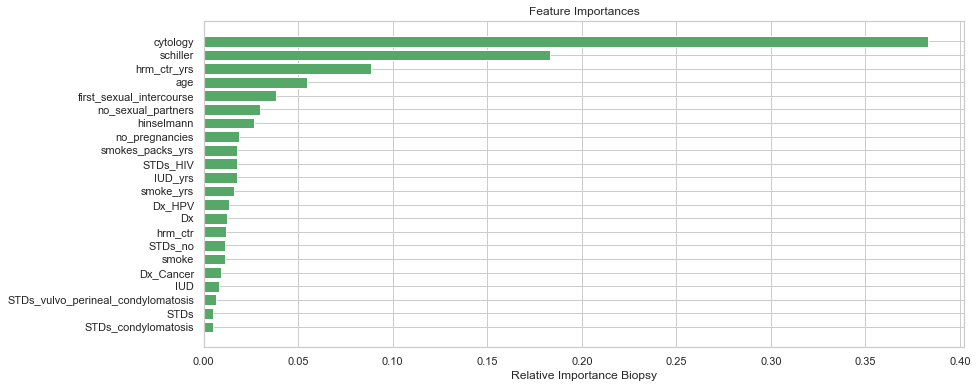

In [47]:
X_data1=mydata.drop(['biopsy'], axis=1)

#fit the random forest model
rf_model.fit(X_data1, my_data.biopsy)

train_features = X_data1.columns
importances = rf_model.feature_importances_
indices1 = np.argsort(importances)[-22:]
#plot
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices1], color='g', align='center')
plt.yticks(range(len(indices)), [train_features[i]for i in indices])
plt.xlabel('Relative Importance Biopsy')
plt.show()

In [48]:
#We will be running our model on two different target variables
#Based on the feature importance chart, we will be selecting features that are important to the model as well 

new_cols = ['age', 'no_sexual_partners', 'first_sexual_intercourse', 'no_pregnancies', 'smoke', 'smoke_yrs', 
            'smokes_packs_yrs', 'hrm_ctr', 'hrm_ctr_yrs', 'IUD', 'IUD_yrs', 'STDs', 'STDs_no', 'STDs_condylomatosis',
            'STDs_vulvo_perineal_condylomatosis', 'STDs_HIV', 'Dx_Cancer','Dx_HPV', 'Dx', 'hinselmann', 'schiller', 'biopsy', 'cytology']

cytology_model_data = pd.DataFrame(data=mydata[new_cols], columns=new_cols)

cytology_model_data.head()

,age,no_sexual_partners,first_sexual_intercourse,no_pregnancies,smoke,smoke_yrs,smokes_packs_yrs,hrm_ctr,hrm_ctr_yrs,IUD,...,STDs_condylomatosis,STDs_vulvo_perineal_condylomatosis,STDs_HIV,Dx_Cancer,Dx_HPV,Dx,hinselmann,schiller,biopsy,cytology
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
new_cols1 = ['age', 'no_sexual_partners', 'first_sexual_intercourse', 'no_pregnancies', 'smoke_yrs', 
            'STDs_genital_herpes', 'hrm_ctr', 'hrm_ctr_yrs', 'STDs_no_diag', 'IUD_yrs', 'STDs', 'STDs_no', 'STDs_condylomatosis',
            'STDs_vulvo_perineal_condylomatosis', 'STDs_HIV', 'Dx_Cancer','Dx_HPV', 'Dx', 'Dx_CIN', 'hinselmann', 'schiller', 'cytology', 'biopsy']

biopsy_model_data = pd.DataFrame(data=mydata[new_cols1], columns=new_cols1)

biopsy_model_data.head()

,age,no_sexual_partners,first_sexual_intercourse,no_pregnancies,smoke_yrs,STDs_genital_herpes,hrm_ctr,hrm_ctr_yrs,STDs_no_diag,IUD_yrs,...,STDs_vulvo_perineal_condylomatosis,STDs_HIV,Dx_Cancer,Dx_HPV,Dx,Dx_CIN,hinselmann,schiller,cytology,biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,37.0,0.0,1.0,3.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# CYTOLOGY PREDICTION

Text(0.5, 1.0, 'Visualization of the Target Variable')

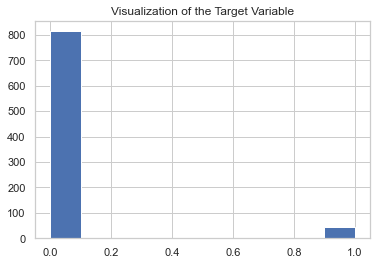

In [50]:
#visualizing the data balance 
cytology_model_data['cytology'].hist()
plt.title('Visualization of the Target Variable')

<AxesSubplot:ylabel='cytology'>

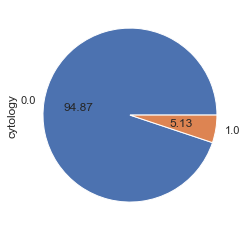

In [51]:
# Show pie plot
cytology_model_data['cytology'].value_counts().plot.pie(autopct='%.2f')

In [52]:
#Splitting the data set for training the model
y = cytology_model_data.pop('cytology')
X = cytology_model_data

print('\n Shape of Target Variable: \n', y.shape)
print('\n Shape of independent Variable: \n', X.shape)


 Shape of Target Variable: 
 (858,)

 Shape of independent Variable: 
 (858, 22)


In [53]:
# spliting the data into train and test splitting using the 70:30 dimension
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('\n Shape of Training Data: \n', X_train.shape)
print('\n Shape of Test Data: \n', X_test.shape)


 Shape of Training Data: 
 (600, 22)

 Shape of Test Data: 
 (258, 22)


In [54]:
# Using over Sampling method to balance our data
# We will be appliny the Over sampling technique on the training set alone.
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of Diagnosed and Undiagnosed classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (600, 22)
Shape of X after SMOTE: (1142, 22)

Balance of Diagnosed and Undiagnosed classes (%):


0.0    50.0
1.0    50.0
Name: cytology, dtype: float64

<AxesSubplot:ylabel='cytology'>

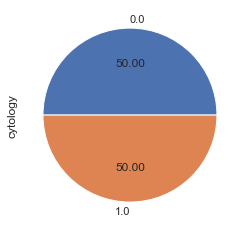

In [55]:
# Show pie plot
y_sm.value_counts().plot.pie(autopct='%.2f')

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
#instantiate Model
model = GradientBoostingClassifier()
#model = MultinomialNB()
# train model to fit
model.fit(X_sm, y_sm)
#predicting the model
y_pred = model.predict(X_test)
print('\nGradient Boosting Classifier Model:\n', y_pred)


Gradient Boosting Classifier Model:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [57]:
#Compute test accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data: {:.2f}'.format(model_accuracy), '\n')

Model Accuracy on Test Data: 0.91 



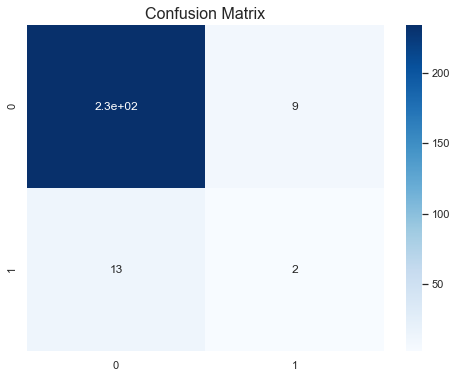

In [58]:
#confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');


In [59]:
class_report = classification_report(y_test, y_pred)
print('\nClassification report on Mental Health Data prediction\n', class_report, '\n')


Classification report on Mental Health Data prediction
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       243
         1.0       0.18      0.13      0.15        15

    accuracy                           0.91       258
   macro avg       0.56      0.55      0.55       258
weighted avg       0.90      0.91      0.91       258
 



# Biopsy Prediction

Text(0.5, 1.0, 'Visualization of the Target Variable')

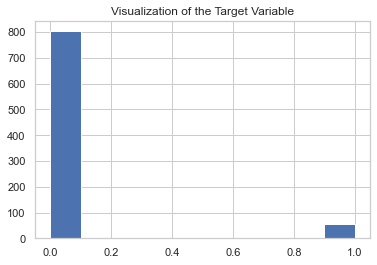

In [60]:
#visualizing the data balance 
biopsy_model_data['biopsy'].hist()
plt.title('Visualization of the Target Variable')

<AxesSubplot:ylabel='biopsy'>

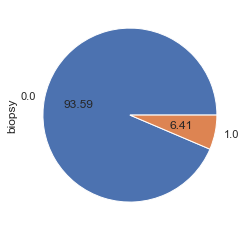

In [61]:
# Show pie plot
biopsy_model_data['biopsy'].value_counts().plot.pie(autopct='%.2f')

In [62]:
#Splitting the data set for training the model
y1 = biopsy_model_data.pop('biopsy')
X1 = biopsy_model_data

print('\n Shape of Target Variable: \n', y1.shape)
print('\n Shape of independent Variable: \n', X1.shape)


 Shape of Target Variable: 
 (858,)

 Shape of independent Variable: 
 (858, 22)


In [63]:
# spliting the data into train and test splitting using the 70:30 dimension
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1)
print('\n Shape of Training Data: \n', X_train1.shape)
print('\n Shape of Test Data: \n', X_test1.shape)


 Shape of Training Data: 
 (600, 22)

 Shape of Test Data: 
 (258, 22)


In [64]:
# Using over Sampling method to balance our data
# We will be appliny the Over sampling technique on the training set alone.

X_sm1, y_sm1 = sm.fit_resample(X_train1, y_train1)

print(f'''Shape of X before SMOTE: {X_train1.shape}
Shape of X after SMOTE: {X_sm1.shape}''')

print('\nBalance of Diagnosed and Undiagnosed classes (%):')
y_sm1.value_counts(normalize=True) * 100

Shape of X before SMOTE: (600, 22)
Shape of X after SMOTE: (1128, 22)

Balance of Diagnosed and Undiagnosed classes (%):


0.0    50.0
1.0    50.0
Name: biopsy, dtype: float64

<AxesSubplot:ylabel='biopsy'>

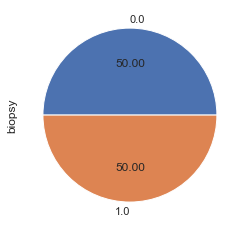

In [65]:
# Show pie plot
y_sm1.value_counts().plot.pie(autopct='%.2f')

In [66]:
#instantiate Model
model1 = GradientBoostingClassifier()
# train model to fit
model1.fit(X_sm1, y_sm1)
#predicting the model
y_pred1 = model1.predict(X_test1)
print('\nGradient Boosting Classifier Model:\n', y_pred1)


Gradient Boosting Classifier Model:
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]


In [67]:
#Compute test accuracy
model_accuracy1 = accuracy_score(y_test1, y_pred1)
print('Model Accuracy on Test Data: {:.2f}'.format(model_accuracy1), '\n')

Model Accuracy on Test Data: 0.96 



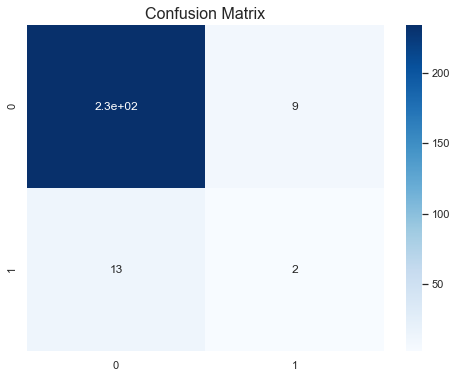

In [68]:
#confusion Matrix
cm1 = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');


In [69]:
class_report1 = classification_report(y_test1, y_pred1)
print('\nClassification report on Cervical Cancer Data prediction\n', class_report, '\n')


Classification report on Cervical Cancer Data prediction
               precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       243
         1.0       0.18      0.13      0.15        15

    accuracy                           0.91       258
   macro avg       0.56      0.55      0.55       258
weighted avg       0.90      0.91      0.91       258
 

